## Pandas (work with table)

In [13]:
import pandas as pd
import os
import requests
os.environ['PYTHONIOENCODING'] = 'UTF-8'

url = "https://uk.wikipedia.org/wiki/Населення_України"
try:
    # Try to read HTML tables from the URL
    response = requests.get(url)
    # Check if the request 
    if response.status_code == 200:
        # Decode the content using UTF-8 encoding
        html_content = response.content.decode('utf-8')
        # Read HTML tables from the decoded content
        tables = pd.read_html(html_content, match="Коефіцієнт народжуваності")
    
    if tables:
        #print(tables)
        df = tables[0]
        print("All tables\n", df)
        print("\nThe first 3 line:\n", df.head(3)) # Find the first 3 lines
    else:
        print("No tables found on the page.")

except Exception as e:
    print("Error:", e)

All tables
                Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119

#### Find the amount of rows/cols in table by using "shape"

In [16]:
print(df.shape)

(28, 9)


#### Replacing "-" values with NaN

In [35]:
df.replace("—", float("NaN"), inplace=True)
print(df)

Before replacement:
             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82  NaN
               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  10

#### Determine the types of all columns using dataframe.dtypes and change the types of 2014/2019 colums to numeric

In [40]:
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')
df['2019'] = pd.to_numeric(df['2019'], errors='coerce')
print(df.dtypes)
print(df)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object
               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0

#### Count the proportion of missing values in each column

In [46]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

missing_values_proportion = missing_values / df.shape[0]
print("\n",missing_values_proportion)

Missing values:
 Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

 Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


#### Remove all country data - the last row from the table

In [47]:
df.drop(index=df.index[-1],axis=0,inplace=True)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

#### Replace missing values with column means

In [51]:
pd.set_option('display.float_format', '{:.2f}'.format) # use for .2f format
column_means = df.iloc[:, 1:].mean()
df = df.fillna(column_means)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим 230.00 206.00 160.00   130    73   126 111.44  80.17
1           Вінницька 224.00 192.00 142.00   124    84   112 109.00  76.00
2           Волинська 247.00 250.00 179.00   153   112   148 141.00 101.00
3    Дніпропетровська 204.00 204.00 151.00   123    71   112 111.00  71.00
4            Донецька 271.00 214.00 140.00   109    61    98  82.00  80.17
5         Житомирська 261.00 223.00 159.00   129    89   122 120.00  79.00
6        Закарпатська 314.00 273.00 207.00   168   115   151 146.00 104.00
7          Запорізька 219.00 197.00 150.00   124    71   106 106.00  68.00
8   Івано-Франківська 243.00 248.00 182.00   155   103   124 122.00  88.00
9            Київська 204.00 189.00 156.00   123    73   122 121.00  80.00
10     Кіровоградська 216.00 171.00 145.00   126    79   110 108.00  68.00
11          Луганська 262.00 235.00 144.00   116    62    96  51.00  80.17
12          Львівська 234

#### Select regions with birth rate above average in 2019

In [59]:
average_birth_rate = df["2019"].mean()
print(average_birth_rate)
above_average_regions = df[(df["2019"]) > average_birth_rate]

# Print the list of regions
print(above_average_regions["Регіон"])

80.17391304347828
2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


#### Find the region with the highest birth rate in 2014

In [67]:
highest_birth_rate_index = df["2014"].idxmax()
highest_birth_rate_region = df.loc[highest_birth_rate_index, "Регіон"]
print("Region:", highest_birth_rate_region)

Region: Рівненська


#### Diagrams:

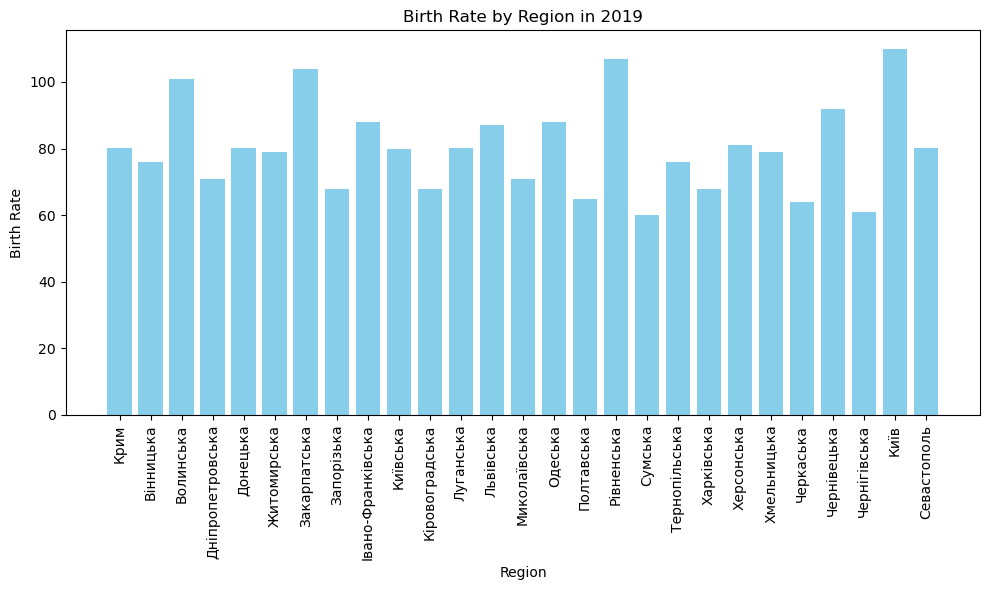

In [73]:
# Create a bar chart of birth rate by region in 2019
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df["Регіон"], df["2019"], color='skyblue')
# Add labels and title
plt.xlabel('Region')
plt.ylabel('Birth Rate')
plt.title('Birth Rate by Region in 2019')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

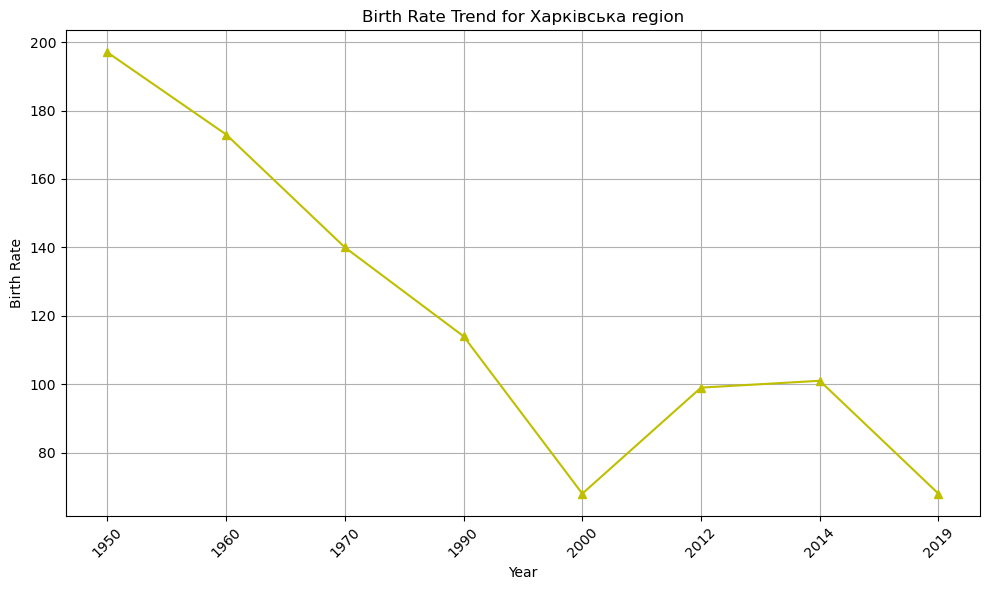

In [78]:
# Liniar graphic for Харківська region
import matplotlib.pyplot as plt

region = 'Харківська'
region_data = df[df['Регіон'] == region]
plt.figure(figsize=(10, 6))
plt.plot(region_data.columns[1:], region_data.iloc[0, 1:], marker='^', color='y', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.title(f'Birth Rate Trend for {region} region')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

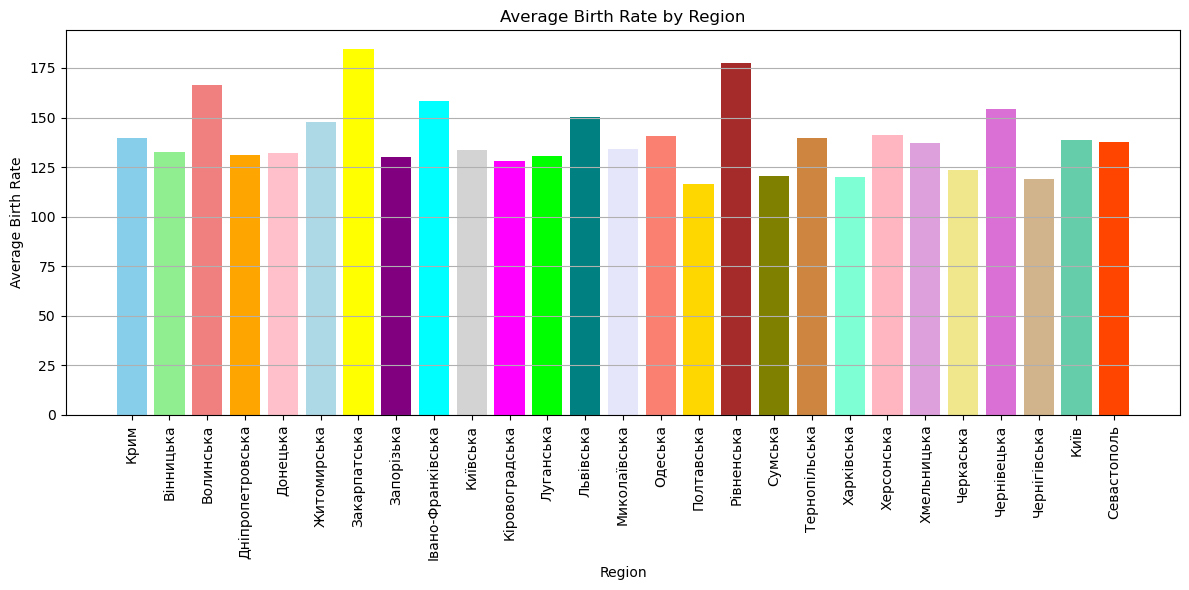

In [83]:
# Diagram of Average Birth Rate by Region

import matplotlib.pyplot as plt

average_birth_rates = df.iloc[:, 1:].mean(axis=1)
#print(average_birth_rates)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'pink', 'lightblue', 'yellow', 'purple', 'cyan', 'lightgray', 'magenta', 'lime', 'teal', 'lavender', 'salmon', 'gold', 'brown', 'olive', 'peru', 'aquamarine', 'lightpink', 'plum', 'khaki', 'orchid', 'tan', 'mediumaquamarine', 'orangered', 'royalblue']

plt.figure(figsize=(12, 6))
plt.bar(df['Регіон'], average_birth_rates, color=colors)

# labels and title
plt.xlabel('Region')
plt.ylabel('Average Birth Rate')
plt.title('Average Birth Rate by Region')
plt.xticks(rotation=90)

# Display the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()